In [1]:
#1
import pandas as pd

raw_data = pd.read_csv('github_bot_raw_data.csv') 
#print(raw_data)  #0-20357
print(f"去重前的数据量是{len(raw_data)}")
data=raw_data.drop_duplicates()   #去重
print(f"去重后的数据量是{len(data)}")
#print(data)


去重前的数据量是20358
去重后的数据量是19779


In [2]:
#2
import pandas as pd

raw_data = pd.read_csv('github_bot_raw_data.csv') 
data=raw_data.drop_duplicates()   #去重
# print(data.columns)
data=data.drop('gravatar_id',axis=1)
print("删除gravatar_id列后余下的列名称：")
print(data.columns)
print()
print("各列缺失值情况：")
print(data.isnull().sum())
print()
# print(data.head(1))
# data=data.dropna()
# print(data.head(1))
# print(data.dropna().head(1))

#将'hireable','company','location'转化为boolean
data['hireable']=data['hireable'].fillna(False)
data['company']=data['company'].fillna(False)
data['location']=data['location'].fillna(False)
#文本数据用空字符串填充
data=data.fillna("")

print("最终各列缺失值情况：")
print(data.isnull().sum())


删除gravatar_id列后余下的列名称：
Index(['actor_id', 'label', 'login', 'id', 'node_id', 'avatar_url', 'url',
       'html_url', 'followers_url', 'following_url', 'gists_url',
       'starred_url', 'subscriptions_url', 'organizations_url', 'repos_url',
       'events_url', 'received_events_url', 'type', 'site_admin', 'name',
       'company', 'blog', 'location', 'email', 'hireable', 'bio',
       'twitter_username', 'public_repos', 'public_gists', 'followers',
       'following', 'created_at', 'updated_at'],
      dtype='object')

各列缺失值情况：
actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
re

C:\Users\32845\AppData\Local\Temp\ipykernel_20056\2709430899.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['hireable']=data['hireable'].fillna(False)


In [3]:
#3
import pandas as pd

raw_data = pd.read_csv('github_bot_raw_data.csv') 
#去重
data=raw_data.drop_duplicates()   
data=data.drop('gravatar_id',axis=1)
#将'hireable','company','location'转化为boolean
data['hireable']=data['hireable'].fillna(False)
data['company']=data['company'].fillna(False)
data['location']=data['location'].fillna(False)
data=data.fillna("")
#去重、缺失值处理完的数据
#print(data.head(1))
#把'created_at','updated_at'转换为时间戳
data['created_at']=pd.to_datetime(data['created_at']).apply(lambda x:x.timestamp())
data['updated_at']=pd.to_datetime(data['updated_at']).apply(lambda x:x.timestamp())
#时间戳是一个整数值，默认为Unix时间戳
print("data['created_at']数据列")
print(data['created_at'])
print()
print("data['updated_at']数据列")
print(data['updated_at'])

data['created_at']数据列
0        1.317058e+09
1        1.435573e+09
2        1.220027e+09
3        1.400611e+09
4        1.345127e+09
             ...     
20344    1.404344e+09
20345    1.512597e+09
20346    1.447512e+09
20347    1.637694e+09
20348    1.461363e+09
Name: created_at, Length: 19779, dtype: float64

data['updated_at']数据列
0        1.697196e+09
1        1.696660e+09
2        1.696213e+09
3        1.697115e+09
4        1.696594e+09
             ...     
20344    1.692118e+09
20345    1.690396e+09
20346    1.661289e+09
20347    1.696633e+09
20348    1.657223e+09
Name: updated_at, Length: 19779, dtype: float64


C:\Users\32845\AppData\Local\Temp\ipykernel_20056\711657208.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['hireable']=data['hireable'].fillna(False)


C:\Users\32845\AppData\Local\Temp\ipykernel_20056\1220288767.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['hireable']=data['hireable'].fillna(False)


4.1:


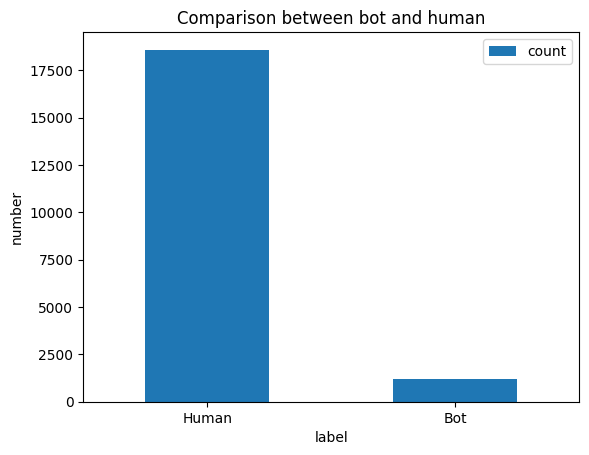

选择条形图比较定类数据
由此可知90%朝上的都是Human发出的数据，不足10%是Bot发出的
整个系统基本上由Human完成交互

4.2:


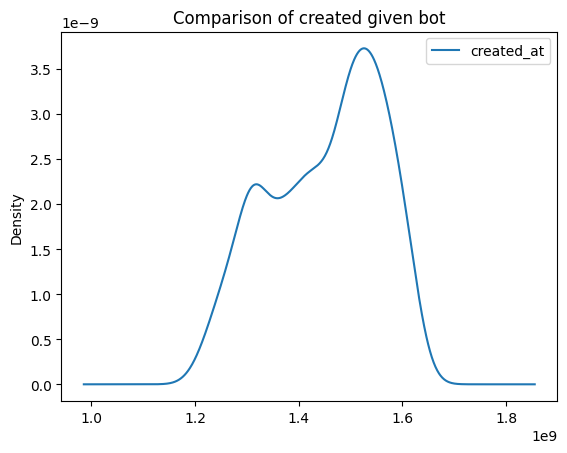

选择几率密度分布图比较大规模的数据
由此可知Bot发出的数据时间分布集中在1.2e9到1,6e9附近，有双峰
可以从中得知项目生命活跃于1.2e9到1,6e9的时间戳内

4.3:


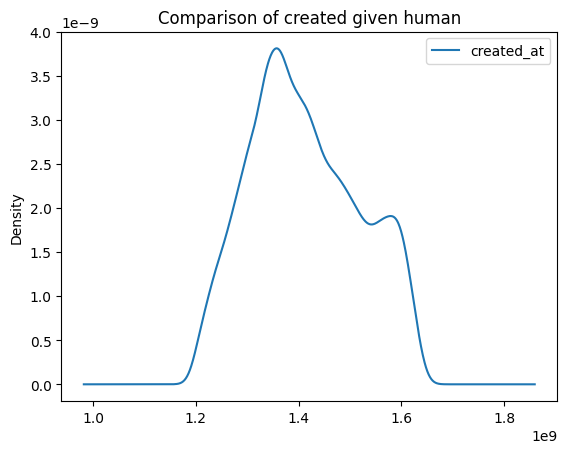

选择几率密度分布图比较大规模的数据
由此可知Human发出的数据时间分布集中在1.2e9到1,6e9附近，有双峰
并且Human数据与Bot数据基本呈现此消彼长的规律

4.4:


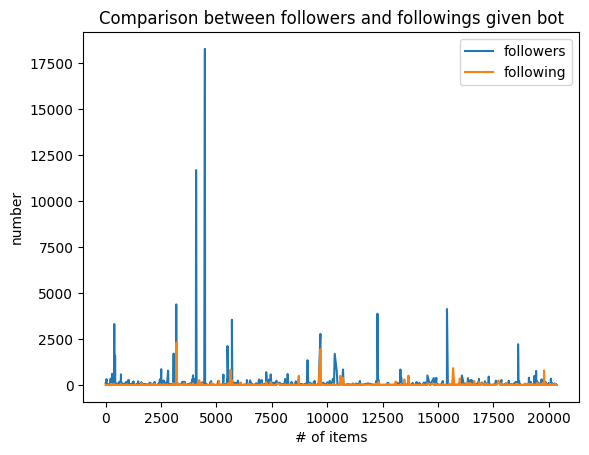

选择折线图比较大规模的数据，使得图像近似于条形图，并且将followers和following画在同一张图里
由此可知Bot的followers很多，但是following很少，且数据量级不超过20000
这些Bot基本上是高质量账号，因为followers较多

4.5:


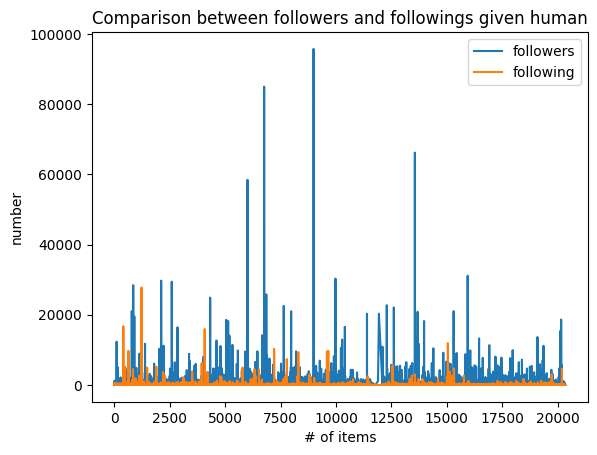

选择折线图比较大规模的数据，使得图像近似于条形图，并且将followers和following画在同一张图里
由此可知Human的followers很多，但是following很少，且数据量级在较Bot大了将近5倍
所展示的这些Human账号基本上是高质量用户，他们发起交互并主导交互，与Bot此消彼长



In [4]:
#4
import pandas as pd

raw_data = pd.read_csv('github_bot_raw_data.csv') 
#去重
data=raw_data.drop_duplicates()   
data=data.drop('gravatar_id',axis=1)
#将'hireable','company','location'转化为boolean
data['hireable']=data['hireable'].fillna(False)
data['company']=data['company'].fillna(False)
data['location']=data['location'].fillna(False)
data=data.fillna("")
#去重、缺失值处理完的数据
#print(data.head(1))
#把'created_at','updated_at'转换为时间戳
data['created_at']=pd.to_datetime(data['created_at']).apply(lambda x:x.timestamp())
data['updated_at']=pd.to_datetime(data['updated_at']).apply(lambda x:x.timestamp())
#处理完的数据


import matplotlib.pyplot as plt

#4.1
print("4.1:")
x=data['label'].value_counts()
x.plot(kind='bar',rot=0,legend=True,
       title="Comparison between bot and human",
       xlabel="label",ylabel="number")
plt.show()
print("选择条形图比较定类数据")
print("由此可知90%朝上的都是Human发出的数据，不足10%是Bot发出的")
print("整个系统基本上由Human完成交互")
print()


#4.2
print("4.2:")
x=data[data['label']=='Bot']
x=x['created_at']
x.plot(kind='density',rot=0,legend=True,
       title="Comparison of created given bot",
       xlabel="timestamp")
plt.show()
print("选择几率密度分布图比较大规模的数据")
print("由此可知Bot发出的数据时间分布集中在1.2e9到1,6e9附近，有双峰")
print("可以从中得知项目生命活跃于1.2e9到1,6e9的时间戳内")
print()


#4.3
print("4.3:")
x=data[data['label']=='Human']
x=x['created_at']
x.plot(kind='density',rot=0,legend=True,
       title="Comparison of created given human",
       xlabel="timestamp")
plt.show()
print("选择几率密度分布图比较大规模的数据")
print("由此可知Human发出的数据时间分布集中在1.2e9到1,6e9附近，有双峰")
print("并且Human数据与Bot数据基本呈现此消彼长的规律")
print()


#4.4
print("4.4:")
x=data[data['label']=='Bot']
y=x['followers']
y.plot(kind='line',rot=0,legend=True,
       title="Comparison between followers and followings given bot",
       xlabel="# of items",ylabel="number")
y=x['following']
y.plot(kind='line',rot=0,legend=True)
plt.show()
print("选择折线图比较大规模的数据，使得图像近似于条形图，并且将followers和following画在同一张图里")
print("由此可知Bot的followers很多，但是following很少，且数据量级不超过20000")
print("这些Bot基本上是高质量账号，因为followers较多")
print()


#4.5
print("4.5:")
x=data[data['label']=='Human']
y=x['followers']
y.plot(kind='line',rot=0,legend=True,
       title="Comparison between followers and followings given human",
       xlabel="# of items",ylabel="number")
y=x['following']
y.plot(kind='line',rot=0,legend=True)
plt.show()
print("选择折线图比较大规模的数据，使得图像近似于条形图，并且将followers和following画在同一张图里")
print("由此可知Human的followers很多，但是following很少，且数据量级在较Bot大了将近5倍")
print("所展示的这些Human账号基本上是高质量用户，他们发起交互并主导交互，与Bot此消彼长")
print()
